# Breast Cancer Support Vector Machines (SVM)

Support Vector Machines (SVM) is a popular classification technique in machine learning. It is used to separate data points into different classes by finding an optimal hyperplane in a high-dimensional feature space. In this dataset, we have 699 samples with their corresponding features. Each sample represents a tumor, and the goal is to predict whether it is benign (class 2) or malignant (class 4). SVM works by transforming the data into a higher-dimensional space, where it tries to find a hyperplane that separates the samples of different classes with the maximum margin. The margin is the distance between the hyperplane and the closest samples from each class. To use SVM for classification, we first need to preprocess the data by separating the features (input) and the class labels (output). 
Next, we can train an SVM model using the dataset. The SVM algorithm finds the optimal hyperplane by solving an optimization problem that maximizes the margin while minimizing the classification error. The hyperplane is represented by a vector of weights and a bias term. The hyperplane equation is given by:
w^T * x + b = 0
where w is the weight vector, x is the feature vector, and b is the bias term. 
SVM is used as a classification technique by finding an optimal hyperplane that separates the samples of different classes with the maximum margin. It transforms the data into a higher-dimensional space using a kernel function and finds the hyperplane using an optimization algorithm. The trained model can then be used to predict the class labels of new samples.

In [1]:
import pandas as pd
# Load the dataset
data = pd.read_csv('breast-cancer-wisconsin.csv')

# Top 5 data from dataset

In [2]:
data.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


# Botton 5 data from the dataset

In [3]:
data.tail()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


# Let's check if there are any missing values:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 699 non-null    int64 
 1   clump_thickness    699 non-null    int64 
 2   size_uniformity    699 non-null    int64 
 3   shape_uniformity   699 non-null    int64 
 4   marginal_adhesion  699 non-null    int64 
 5   epithelial_size    699 non-null    int64 
 6   bare_nucleoli      699 non-null    object
 7   bland_chromatin    699 non-null    int64 
 8   normal_nucleoli    699 non-null    int64 
 9   mitoses            699 non-null    int64 
 10  class              699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


# Total number of rows and colums.

In [5]:
data.shape

(699, 11)

In [6]:
data.size

7689

# Number of data per column

In [7]:
data.count()

id                   699
clump_thickness      699
size_uniformity      699
shape_uniformity     699
marginal_adhesion    699
epithelial_size      699
bare_nucleoli        699
bland_chromatin      699
normal_nucleoli      699
mitoses              699
class                699
dtype: int64

# Type of cancers (count of class 2 and class 4)

In [8]:
data['class'].value_counts()

2    458
4    241
Name: class, dtype: int64

# We are building our model using this sample data

In [9]:
benign = data[data['class'] == 2]
malignant = data[data['class'] == 4]

# we have extructed dataset now and we will plot the graph for the benign and malignant

In [10]:
import numpy as np
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='clump_thickness', ylabel='size_uniformity'>

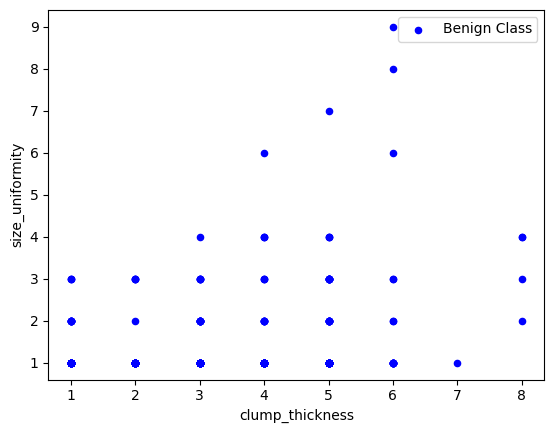

In [11]:
benign.plot(kind='scatter', x="clump_thickness", y="size_uniformity", color="blue", label = "Benign Class")

<AxesSubplot:xlabel='clump_thickness', ylabel='size_uniformity'>

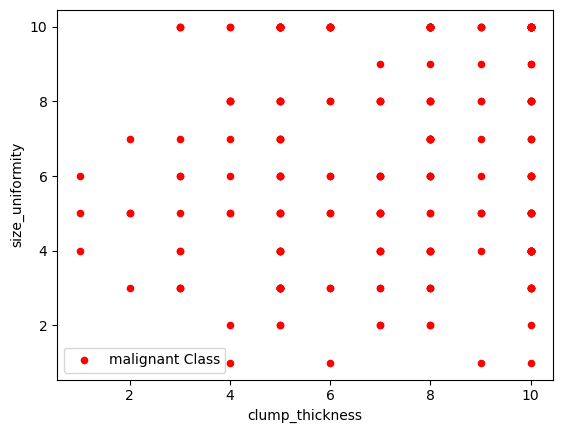

In [12]:
malignant.plot(kind='scatter', x="clump_thickness", y="size_uniformity", color="red", label = "malignant Class")

# We want to mix the above two graphs to see all data in 1 graph

<AxesSubplot:xlabel='clump_thickness', ylabel='size_uniformity'>

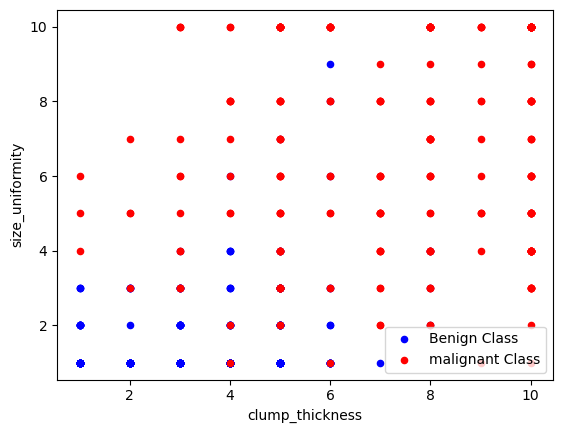

In [13]:
axes= benign.plot(kind='scatter', x="clump_thickness", y="size_uniformity", color="blue", label = "Benign Class")
malignant.plot(kind='scatter', x="clump_thickness", y="size_uniformity", color="red", label = "malignant Class", ax = axes)

In [14]:
data.dtypes

id                    int64
clump_thickness       int64
size_uniformity       int64
shape_uniformity      int64
marginal_adhesion     int64
epithelial_size       int64
bare_nucleoli        object
bland_chromatin       int64
normal_nucleoli       int64
mitoses               int64
class                 int64
dtype: object

#  The Bare Nucleoli is an object. We need to convert it to int.

In [15]:
data = data[pd.to_numeric(data["bare_nucleoli"], errors = "coerce").notnull()]

In [17]:
data["bare_nucleoli"] = data["bare_nucleoli"].astype("int")

In [18]:
data.dtypes

id                   int64
clump_thickness      int64
size_uniformity      int64
shape_uniformity     int64
marginal_adhesion    int64
epithelial_size      int64
bare_nucleoli        int32
bland_chromatin      int64
normal_nucleoli      int64
mitoses              int64
class                int64
dtype: object

In [19]:
data.columns

Index(['id', 'clump_thickness', 'size_uniformity', 'shape_uniformity',
       'marginal_adhesion', 'epithelial_size', 'bare_nucleoli',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')

In [20]:
feature = data[['clump_thickness', 'size_uniformity', 'shape_uniformity',
       'marginal_adhesion', 'epithelial_size', 'bare_nucleoli',
       'bland_chromatin', 'normal_nucleoli', 'mitoses']]

# x is our independent variable and y is our dependent variable

In [21]:
x = np.asarray(feature)

In [22]:
y = np.asarray(data["class"])

In [23]:
x

array([[ 5,  1,  1, ...,  3,  1,  1],
       [ 5,  4,  4, ...,  3,  2,  1],
       [ 3,  1,  1, ...,  3,  1,  1],
       ...,
       [ 5, 10, 10, ...,  8, 10,  2],
       [ 4,  8,  6, ..., 10,  6,  1],
       [ 4,  8,  8, ..., 10,  4,  1]], dtype=int64)

In [24]:
y

array([2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 4,
       2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 4, 4, 4, 4, 2,
       4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4, 2, 4,
       4, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4, 2, 4,
       4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2,
       4, 4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2,
       2, 4, 4, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2,
       2, 4, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 2, 4, 2, 2, 4, 4, 4, 4, 2,
       4, 4, 2, 4, 4, 4, 2, 4, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2,
       2, 4, 2, 4, 4, 4, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 4, 2,
       4, 4, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 2, 2, 4, 4, 2,
       2, 4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 4,

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [27]:
x_train.shape

(546, 9)

In [28]:
x_test.shape

(137, 9)

In [29]:
y_train.shape

(546,)

In [30]:
y_test.shape

(137,)

# We have 546 samples. These samples are used for training. 137 are used for testing data. 
## We have given 20% as our test_size. 
### Now we are creating a Support Vector Machines (SVM) using Scikit-learn.

Kernel method are a class of algoriths for pattern analysis. Gamma parameter determins the distance a single data sample exerts influence or it is said to adjust the curvature of the decision boundary. C determines penalty or howmany samples are allowed to be placed in different classes.

In [31]:
from sklearn.svm import SVC

In [32]:
model = SVC(kernel = 'linear', gamma = "auto", C = 0.3)

In [33]:
model.fit(x_train,y_train)

SVC(C=0.3, gamma='auto', kernel='linear')

In [34]:
y_predicted = model.predict(x_test)

## we can identify the difference between actual dataset (x_test) and the predicted dataset (y_predicted)

In [35]:
from sklearn.metrics import classification_report

In [36]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           2       0.99      0.95      0.97        83
           4       0.93      0.98      0.95        54

    accuracy                           0.96       137
   macro avg       0.96      0.97      0.96       137
weighted avg       0.96      0.96      0.96       137



#### We can see precision of our prediction is 99% for the class 2 and 93% for the class 4. This is how the system calculates precision.
Precision = (True positive)/(True positive + False positive)
or precision = (true)/Total
f1 score is harmonical mean that is 
f1 score = 2*(precision * recall)/(precision + recall)
and support means instance
Here it shows class 2 were positive and class 4 were negative
Here 137 is 83+54 which is result of dataset.

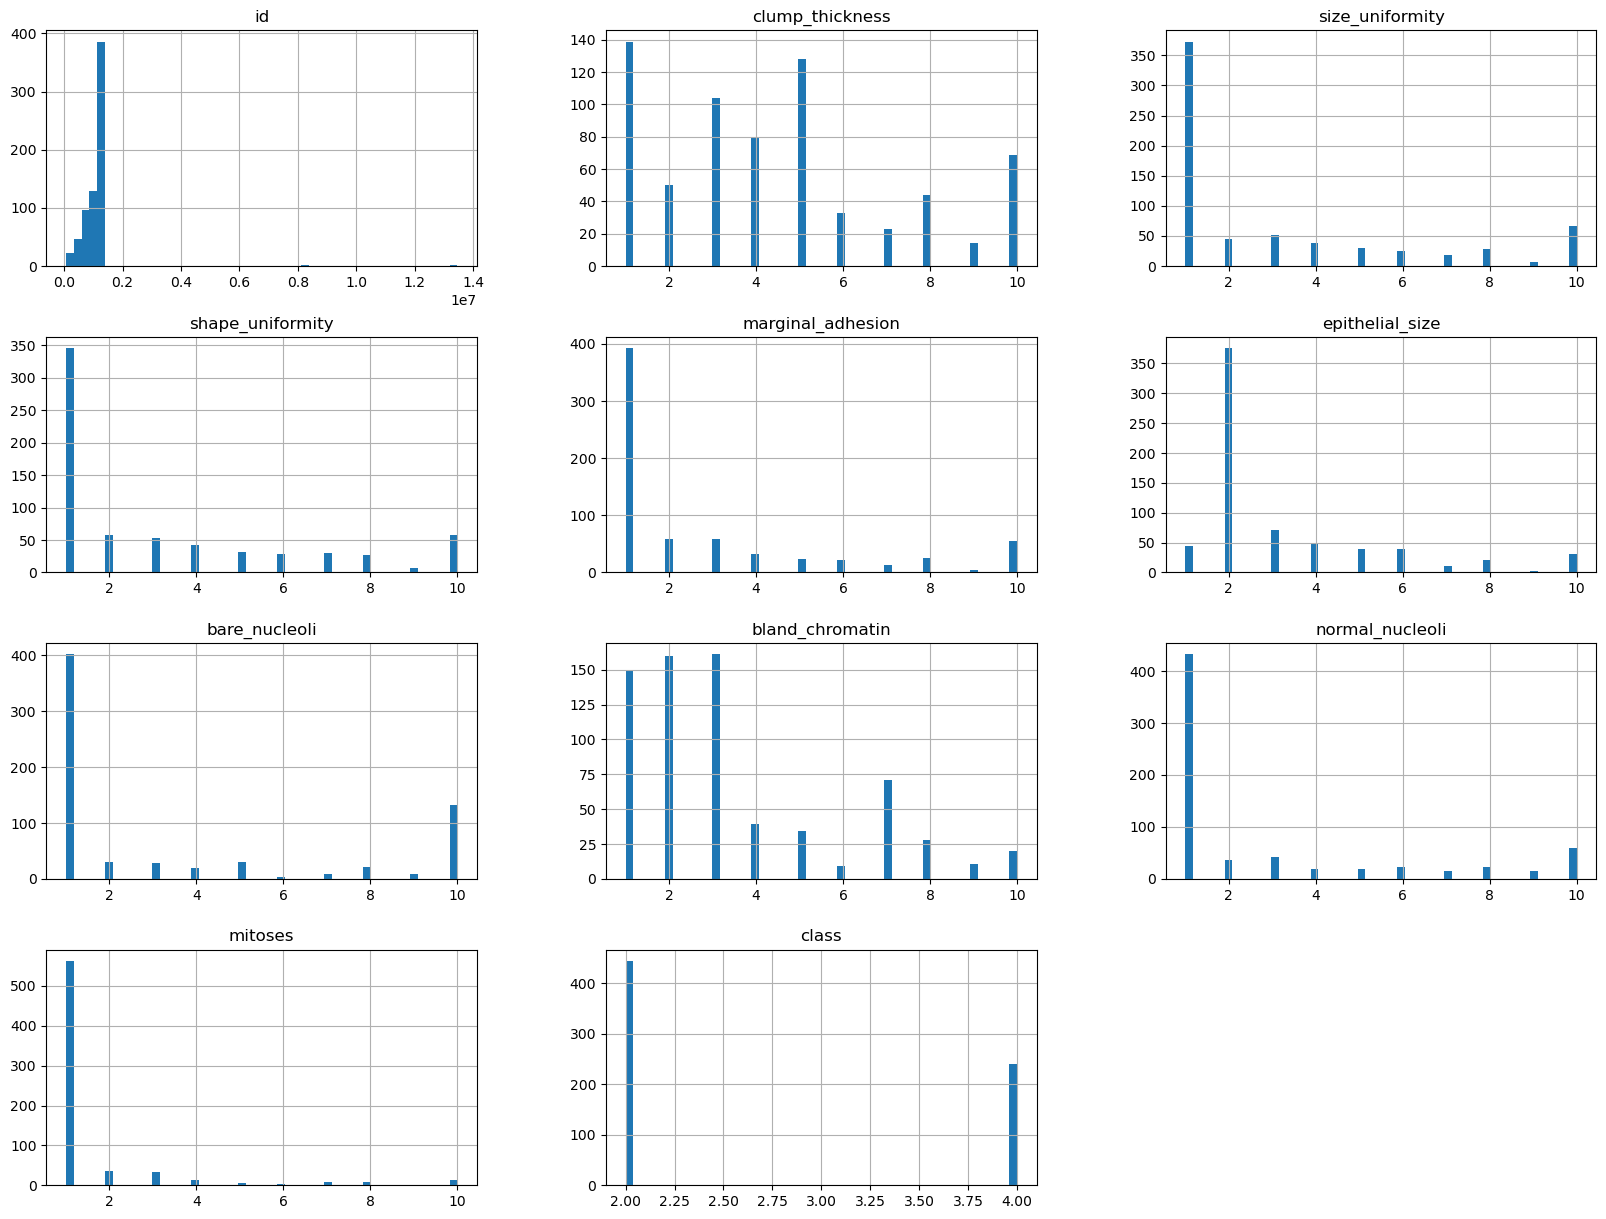

In [37]:
# plot within jupyter
%matplotlib inline 
import matplotlib.pyplot as plt

# plot histogram
data.hist(bins=50, figsize=(20,15))
plt.show()

In [38]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test,y_predicted))

Accuracy: 0.9635036496350365
